In [ ]:
Task-7:Project Implementation:

In [ ]:
Based on any real time data work and develop ML Model for
Prediciton.

In [ ]:
1. Import Necessary Libraries

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings

# Suppress warnings
warnings.filterwarnings("ignore")

In [ ]:
2. Load the Dataset

In [5]:
generation_data = pd.read_csv("C:\\Users\\lahar\\OneDrive\\Desktop\\Sem-3\\Ad.Python\\Plant_1_Generation_Data.csv")
# Convert 'DATE_TIME' to datetime format
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], errors='coerce')

# Set 'DATE_TIME' as index
generation_data.set_index('DATE_TIME', inplace=True)

# Check data
print(generation_data.head())

            PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
DATE_TIME                                                                
2020-05-15   4135001  1BY6WEcLGh8j5v7       0.0       0.0          0.0   
2020-05-15   4135001  1IF53ai7Xc0U56Y       0.0       0.0          0.0   
2020-05-15   4135001  3PZuoBAID5Wc2HD       0.0       0.0          0.0   
2020-05-15   4135001  7JYdWkrLSPkdwr4       0.0       0.0          0.0   
2020-05-15   4135001  McdE0feGgRqW7Ca       0.0       0.0          0.0   

            TOTAL_YIELD  
DATE_TIME                
2020-05-15    6259559.0  
2020-05-15    6183645.0  
2020-05-15    6987759.0  
2020-05-15    7602960.0  
2020-05-15    7158964.0  


In [ ]:
3. Data Preprocessing

In [6]:
# Check for missing values
print(generation_data.isnull().sum())

# Drop rows with NaN values (if any)
generation_data.dropna(inplace=True)

# Check if the dataset is stationary (for time series models)
result = adfuller(generation_data['DC_POWER'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] < 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary. Differencing will be applied.")

PLANT_ID       0
SOURCE_KEY     0
DC_POWER       0
AC_POWER       0
DAILY_YIELD    0
TOTAL_YIELD    0
dtype: int64
ADF Statistic: -6.363710447053652
p-value: 2.438917788346199e-08
The time series is stationary.


In [ ]:
4. Feature Engineering

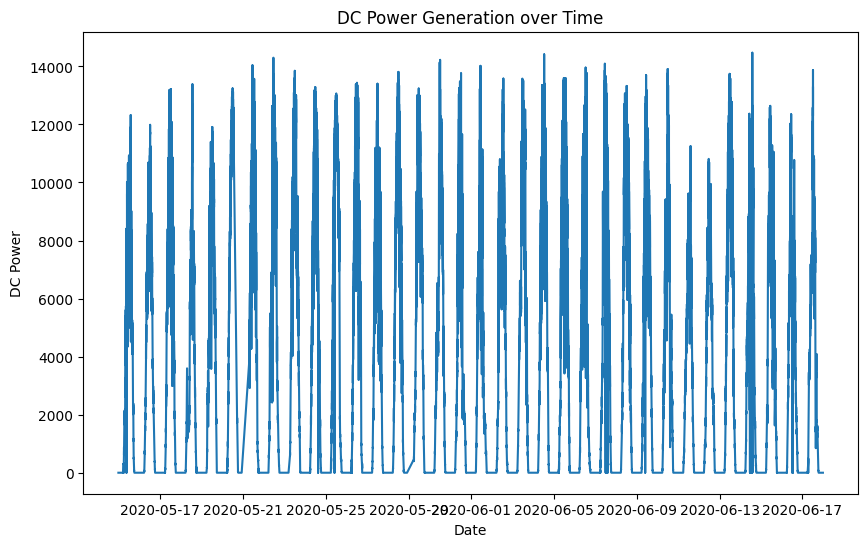

In [7]:
# Create additional features
generation_data['day'] = generation_data.index.day
generation_data['month'] = generation_data.index.month
generation_data['year'] = generation_data.index.year
generation_data['hour'] = generation_data.index.hour

# Visualize the data
plt.figure(figsize=(10, 6))
plt.plot(generation_data['DC_POWER'])
plt.title('DC Power Generation over Time')
plt.xlabel('Date')
plt.ylabel('DC Power')
plt.show()


In [ ]:
5. Train-Test Split

In [8]:
from sklearn.preprocessing import StandardScaler

# Split the data into features (X) and target variable (y)
X = generation_data[['day', 'month', 'year', 'hour']]  # Time-based features
y = generation_data['DC_POWER']  # Target variable (could be AC_POWER or DAILY_YIELD)

# Standardize the features (if needed)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(array([[ 1.54743733, -1.03784978,  0.        ,  1.5202761 ],
        [ 0.49538444, -1.03784978,  0.        ,  0.93739194],
        [ 0.6122792 , -1.03784978,  0.        , -0.22837638],
        ...,
        [-0.55666845,  0.96353058,  0.        , -0.37409742],
        [-0.08908939, -1.03784978,  0.        , -0.22837638],
        [ 0.84606874, -1.03784978,  0.        , -0.51981846]]),
 array([[-0.67356321,  0.96353058,  0.        ,  1.08311298],
        [ 1.43054256, -1.03784978,  0.        , -1.68558679],
        [ 0.14470014, -1.03784978,  0.        ,  0.50022882],
        ...,
        [-0.67356321,  0.96353058,  0.        , -0.66553951],
        [ 0.9629635 , -1.03784978,  0.        ,  0.50022882],
        [-0.79045798,  0.96353058,  0.        , -1.53986575]]),
 DATE_TIME
 2020-05-29 22:30:00        0.00000
 2020-05-20 18:45:00        0.00000
 2020-05-21 10:45:00    11223.57143
 2020-06-09 23:30:00        0.00000
 2020-05-22 02:30:00        0.00000
                           ...     

In [ ]:
6. Model Building

In [9]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')


Root Mean Squared Error (RMSE): 961.2444910002295


In [ ]:
7. ARIMA Model

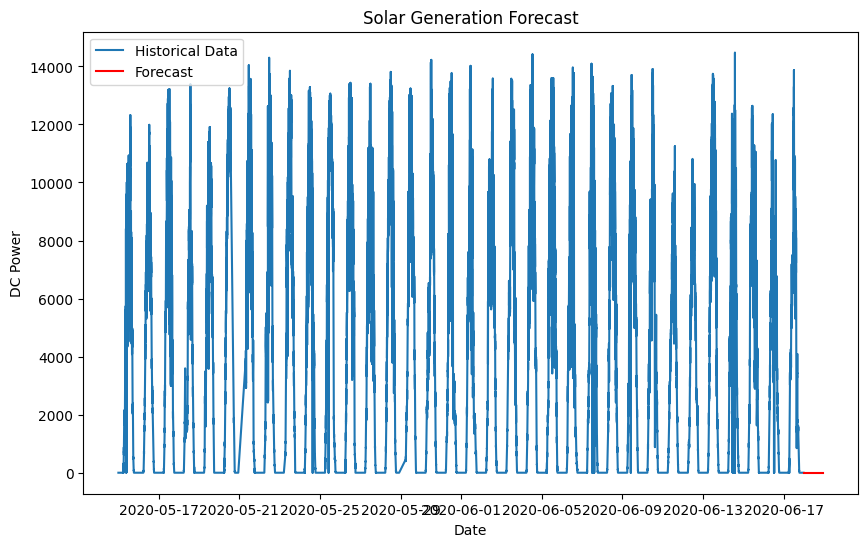

In [10]:
# ARIMA Model (example)
from statsmodels.tsa.arima.model import ARIMA

# Fit the ARIMA model
arima_model = ARIMA(generation_data['DC_POWER'], order=(5, 1, 0))  # You can adjust (p, d, q)
arima_model_fit = arima_model.fit()

# Forecasting
forecast_steps = 24  # For example, forecasting the next 24 hours
forecast = arima_model_fit.forecast(steps=forecast_steps)

# Plot the forecasted values
plt.figure(figsize=(10, 6))
plt.plot(generation_data.index, generation_data['DC_POWER'], label='Historical Data')
plt.plot(pd.date_range(generation_data.index[-1], periods=forecast_steps, freq='H'), forecast, label='Forecast', color='red')
plt.title('Solar Generation Forecast')
plt.xlabel('Date')
plt.ylabel('DC Power')
plt.legend()
plt.show()


In [ ]:
8. Model Evaluation

In [11]:
# Evaluate Random Forest
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error (RMSE): {rmse}')

Root Mean Squared Error (RMSE): 961.2444910002295


In [ ]:
9.Model Tuning

In [ ]:
#Grid Search

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

# Initialize RandomForestRegressor
rf = RandomForestRegressor(random_state=42)

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [10, 20, None],      # Maximum depth of the tree
    'min_samples_split': [2, 5, 10]   # Minimum number of samples required to split an internal node
}

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 200}
Best Score: 0.9434187385607983


In [ ]:
#Cross-Validation

In [13]:
from sklearn.model_selection import cross_val_score

# Initialize the model with the best parameters from GridSearchCV
best_rf_model = grid_search.best_estimator_

# Perform 5-fold cross-validation
cv_scores = cross_val_score(best_rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Print average cross-validation score (RMSE)
print(f"Average RMSE from cross-validation: {np.sqrt(-cv_scores.mean())}")


Average RMSE from cross-validation: 960.9325789863386


In [ ]:
#Advanced Model

In [ ]:
##Preparing the Data for LSTM

In [13]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Normalize the target variable (DC_POWER)
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Convert to a supervised learning problem (e.g., past 24 hours to predict next hour)
def create_dataset(data, time_step=24):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])  # Time step data
        y.append(data[i + time_step, 0])      # Target variable
    return np.array(X), np.array(y)

# Create the dataset for LSTM
time_step = 24
X_lstm, y_lstm = create_dataset(y_scaled, time_step)

# Reshape X for LSTM input (samples, time steps, features)
X_lstm = X_lstm.reshape(X_lstm.shape[0], X_lstm.shape[1], 1)

# Split into train and test sets
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(X_lstm, y_lstm, test_size=0.2, random_state=42)
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm

(array([[[0.00551838],
         [0.00522222],
         [0.00589968],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],
 
        [[0.49976246],
         [0.52266151],
         [0.48340599],
         ...,
         [0.36993866],
         [0.35609829],
         [0.35990883]],
 
        [[0.        ],
         [0.        ],
         [0.        ],
         ...,
         [0.        ],
         [0.        ],
         [0.        ]],
 
        ...,
 
        [[0.31162055],
         [0.30220525],
         [0.30969431],
         ...,
         [0.30478428],
         [0.33379772],
         [0.32341251]],
 
        [[0.41519751],
         [0.5920065 ],
         [0.51030068],
         ...,
         [0.66417978],
         [0.4586572 ],
         [0.46584146]],
 
        [[0.53598113],
         [0.57972588],
         [0.50085083],
         ...,
         [0.53923145],
         [0.52111656],
         [0.56457255]]]),
 array([[[0.53352551],
         [0.49450198],
         

In [ ]:
##Building the LSTM Model

In [14]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Build the LSTM model
model = Sequential()

# Add LSTM layers
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train_lstm.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Fit the model
model.fit(X_train_lstm, y_train_lstm, epochs=20, batch_size=32, validation_data=(X_test_lstm, y_test_lstm))


Epoch 1/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 79s 42ms/step - loss: 0.0051 - val_loss: 0.0020
Epoch 2/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 72s 42ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 3/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 69s 40ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 4/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 5/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 64s 37ms/step - loss: 0.0023 - val_loss: 0.0024
Epoch 6/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 253s 147ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 7/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 69s 40ms/step - loss: 0.0025 - val_loss: 0.0019
Epoch 8/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 67s 39ms/step - loss: 0.0024 - val_loss: 0.0018
Epoch 9/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 68s 39ms/step - loss: 0.0023 - val_loss: 0.0018
Epoch 10/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 70s 41ms/step - loss: 0.0022 - val_loss: 0.0018
Epoch 11/20
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 65s 38ms/step - loss: 0.0021 - val_loss: 0.0019
Epoch 

In [ ]:
##Make Predictions and Evaluate

In [16]:
# Make predictions
y_pred_lstm = model.predict(X_test_lstm)

# Inverse transform predictions to original scale
y_pred_lstm = scaler.inverse_transform(y_pred_lstm)
y_test_lstm = scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# Calculate RMSE
rmse_lstm = np.sqrt(mean_squared_error(y_test_lstm, y_pred_lstm))
print(f"LSTM RMSE: {rmse_lstm}")

430/430 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step
LSTM RMSE: 601.0874692361183
